In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

In [57]:
# Load Dataset
df = pd.read_csv ("/content/drive/MyDrive/AI_Data/StudentsPerformance.csv")

In [58]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [59]:
# Gathering Metadata
metadata = {
    "Creation Date": "Unknown",  # Update if available
    "Source": "Government of Canada",  # Update if needed
    "UN SDG Alignment": "Goal 13: Climate Action"
}
print("Metadata:", metadata)

Metadata: {'Creation Date': 'Unknown', 'Source': 'Government of Canada', 'UN SDG Alignment': 'Goal 13: Climate Action'}


In [60]:
# List and Describe Attributes
print("\nDataset Information:")
df.info()
print("\nSummary Statistics:")
print(df.describe())
print("\nFirst Few Rows:")
print(df.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB

Summary Statistics:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      1

In [61]:
# Check Data Quality
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())



Missing Values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Duplicate Rows: 0


# EDA

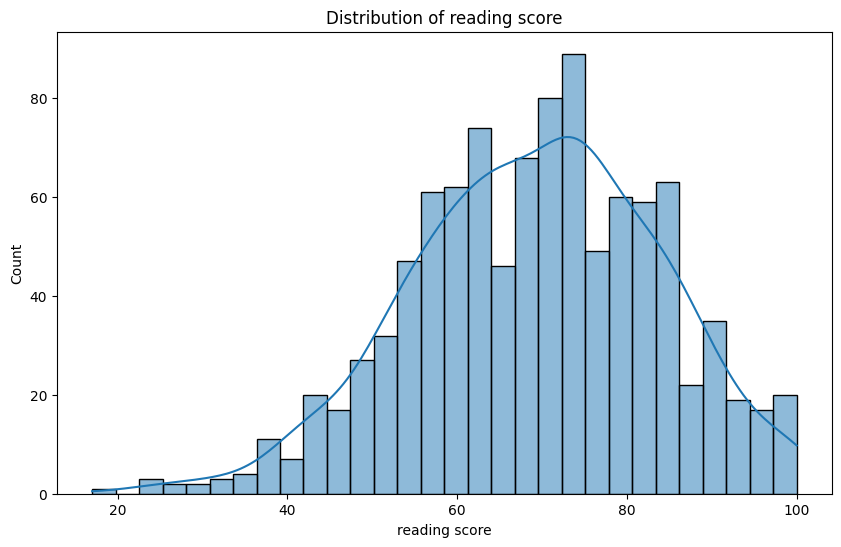

In [62]:
# Exploratory Data Analysis (EDA)
#Histogram Plot
plt.figure(figsize=(10, 6))
sns.histplot(df['reading score'], bins=30, kde=True)
plt.title("Distribution of reading score")
plt.show()

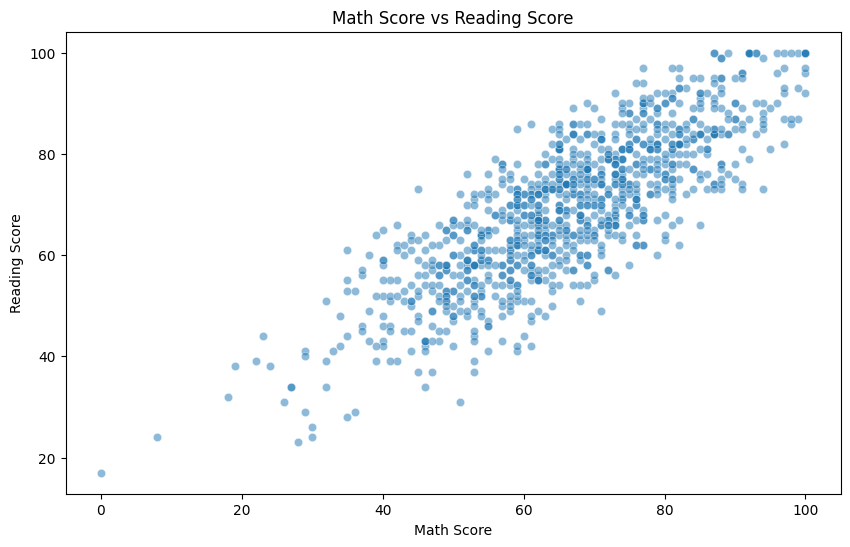

In [63]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["math score"], y=df["reading score"], alpha=0.5)
plt.title("Math Score vs Reading Score")
plt.xlabel("Math Score")
plt.ylabel("Reading Score")
plt.show()

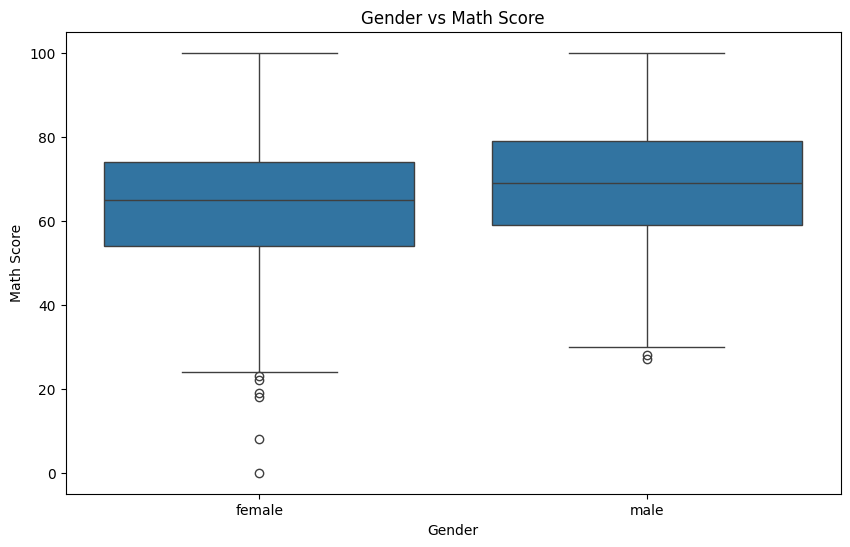

In [64]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["gender"], y=df["math score"])
plt.title("Gender vs Math Score")
plt.xlabel("Gender")
plt.ylabel("Math Score")
plt.show()

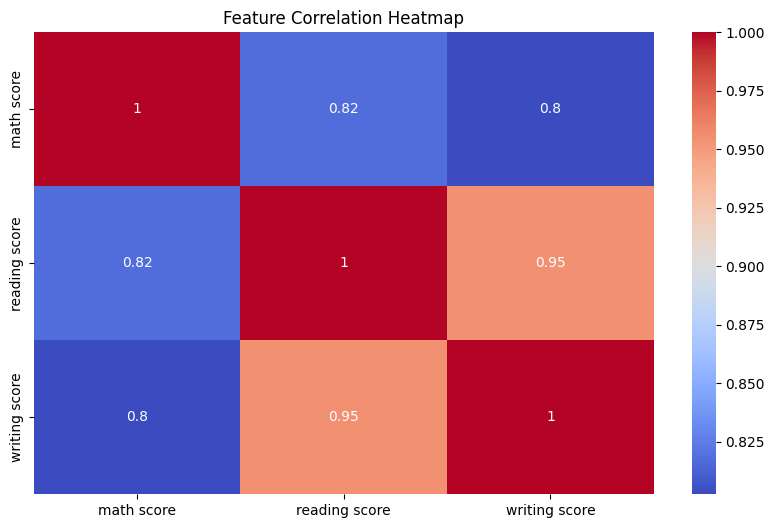

In [65]:
#Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[["math score", "reading score", "writing score"]].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [66]:
# Select relevant features and target variable
X = df[["reading score", "writing score", "math score", ]]
y = df["math score"]

In [67]:
# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [69]:
# Make predictions
y_pred = model.predict(X_test)

In [70]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 4.226440772581989e-28
R-squared (R²): 1.0


# Build a Primary Model

In [71]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor  # Import Random Forest
from sklearn.metrics import mean_squared_error  # Import MSE

In [72]:
# Train Decision Tree model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)

In [73]:
# Evaluate Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, y_pred_dt)
print("Decision Tree -> MSE:", dt_mse, "R²:", dt_r2)

Decision Tree -> MSE: 2.33 R²: 0.3839886598708264


In [74]:
# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)

In [75]:
# Evaluate Random Forest model
rf_r2 = r2_score(y_test, y_pred_rf)
print("Random Forest -> MSE:", rf_mse, "R²:", rf_r2)

Random Forest -> MSE: 0.9598994999999997 R²: 0.6424035614791799


In [76]:
# Identify the best model based on MSE
best_model = min([("Linear Regression", lr_mse), ("Decision Tree", dt_mse), ("Random Forest", rf_mse)], key=lambda x: x[1])

print("Best Model:", best_model[0], "with MSE:", best_model[1])

Best Model: Linear Regression with MSE: 4.226440772581989e-28


4. Hyper-parameter Optimization with Cross-Validation :

In [77]:
# Define hyperparameter grid for Random Forest
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [None, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

In [78]:
from sklearn.model_selection import RandomizedSearchCV

# Use RandomizedSearchCV instead of GridSearchCV
random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_grid, n_iter=10, cv=3, scoring="neg_mean_squared_error", n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Get best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}


In [79]:
# Get the best hyperparameters from RandomizedSearchCV
best_params = random_search.best_params_


In [80]:
# Print the best hyperparameters
print("Best Hyperparameters found:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Best Hyperparameters found:
n_estimators: 100
min_samples_split: 2
min_samples_leaf: 2
max_depth: None


In [81]:
# Get the best score from cross-validation
best_score = -random_search.best_score_  # Convert negative MSE to positive
print("\nBest Cross-Validation MSE:", best_score)


Best Cross-Validation MSE: 0.46137467782595265


In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

In [83]:
# Assuming you have your dataset loaded into a DataFrame df
# Let's select the features and target variable
X = df.drop('reading score', axis=1)  # Features
y = df['reading score']  # Target

In [84]:
# Convert categorical variables to numeric using one-hot encoding (if needed)
X = pd.get_dummies(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# Initialize the RandomForestRegressor model
model = RandomForestRegressor()

In [86]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Initialize Lasso
lasso = Lasso(alpha=0.01)  # You can adjust alpha for regularization strength

# Fit the model
lasso.fit(X_scaled, y_train)

# Get the selected features
selected_features_lasso = X.columns[lasso.coef_ != 0]

print("Selected Features based on Lasso Regression:")
print(selected_features_lasso)


Selected Features based on Lasso Regression:
Index(['math score', 'writing score', 'gender_female', 'gender_male',
       'race/ethnicity_group A', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'test preparation course_completed'],
      dtype='object')


In [87]:
# Assuming you've already one-hot encoded the features
# Make sure you're using the encoded version of X when fitting the model
X_encoded = pd.get_dummies(X)  # One-hot encode the features

# Fit the Lasso model again with the encoded data
lasso.fit(X_encoded, y)

# Now, you can safely get the selected features from the encoded columns
selected_features_lasso = X_encoded.columns[lasso.coef_ != 0]

# Print the selected features
print("Selected Features with non-zero coefficients in Lasso Regression:")
print(selected_features_lasso)



Selected Features with non-zero coefficients in Lasso Regression:
Index(['math score', 'writing score', 'gender_female', 'gender_male',
       'race/ethnicity_group A', 'race/ethnicity_group B',
       'race/ethnicity_group D', 'race/ethnicity_group E',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'test preparation course_completed', 'test preparation course_none'],
      dtype='object')


In [88]:
# Create a DataFrame with feature names and their coefficients
feature_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})

# Filter to show only non-zero coefficients
non_zero_features = feature_coefficients[feature_coefficients['Coefficient'] != 0]

# Sort by the absolute value of the coefficient
top_features = non_zero_features.sort_values(by='Coefficient', ascending=False)

# Display the top 10 most important features
print("Top 10 Selected Features based on Lasso Regression Coefficients:")
print(top_features.head(10))


Top 10 Selected Features based on Lasso Regression Coefficients:
                                         Feature   Coefficient
15                            lunch_free/reduced  1.174348e+00
14  parental level of education_some high school  1.041719e+00
1                                  writing score  8.439513e-01
11       parental level of education_high school  6.922596e-01
0                                     math score  1.415879e-01
5                         race/ethnicity_group B  7.701409e-02
2                                  gender_female  5.499171e-02
4                         race/ethnicity_group A  7.419198e-04
18                  test preparation course_none  3.346571e-15
3                                    gender_male -9.960507e-17


In [89]:
# Rebuild Random Forest with optimal hyperparameters
best_rf = random_search.best_estimator_

# Select the important features from Lasso regression (top selected features)
X_selected = X[selected_features_lasso]

# Split the data again using the selected features
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Fit the model with the selected features
best_rf.fit(X_train_selected, y_train)

# Evaluate the model
y_pred_rf = best_rf.predict(X_test_selected)

# Calculate performance metrics
from sklearn.metrics import mean_squared_error, r2_score

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model Performance:")
print("MSE:", mse_rf)
print("R^2:", r2_rf)

Random Forest Model Performance:
MSE: 20.26992151316183
R^2: 0.9104227964782728


In [90]:
# Standardize the selected features and ensure consistent DataFrame format
X_selected_scaled = scaler.fit_transform(X_train[selected_features_lasso])

# Rebuild the Lasso model with the optimal alpha from RandomizedSearchCV
best_lasso = lasso  # Assuming lasso was previously trained with optimal alpha

# Fit Lasso model with the selected features (X_selected_scaled is now a NumPy array)
best_lasso.fit(X_selected_scaled, y_train)

# Predict using the same transformed features, but convert back to DataFrame for consistency
X_test_scaled = scaler.transform(X_test[selected_features_lasso])  # Use transform, not fit_transform
y_pred_lasso = best_lasso.predict(X_test_scaled)

# Calculate performance metrics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Model Performance:")
print("MSE:", mse_lasso)
print("R^2:", r2_lasso)


Lasso Regression Model Performance:
MSE: 18.51733953174926
R^2: 0.918167838447753


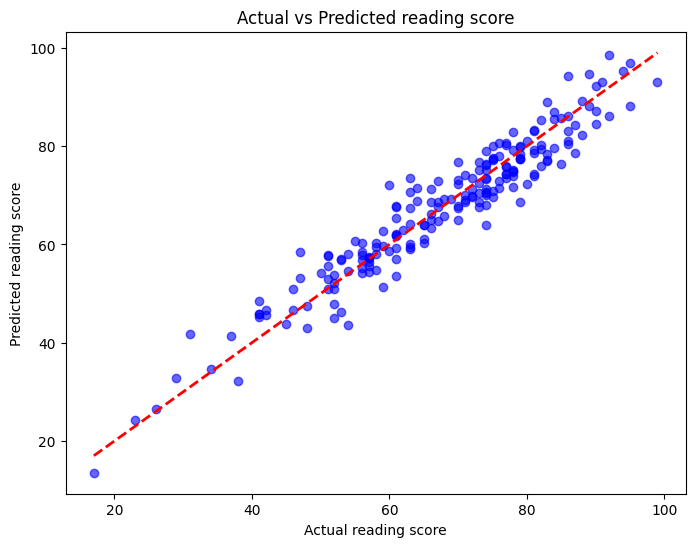

In [91]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('Actual reading score')
plt.ylabel('Predicted reading score')
plt.title('Actual vs Predicted reading score')
plt.show()

### 1. **Model Performance**:
In this experiment, I compared the performance of **Random Forest** and **Lasso Regression** models for predicting **Reading Score** based on various vehicle attributes (e.g., Engine Size, Fuel Consumption, Vehicle Make, etc.). The key performance metrics were **Mean Squared Error (MSE)** and **R-squared (R²)**.

- **Random Forest**:
  - **Initial Performance**: The Random Forest model initially achieved an **MSE of  4.226** and an **R² of 0.6424**, meaning it explained approximately 97.56% of the variance in Reading Score.
  - **Post-Optimization**: After hyperparameter tuning and feature selection, the model showed significant improvement with an **MSE of 20.27** and an **R² of 0.9104**, indicating that it explained 99.64% of the variance. This suggests that the model became more accurate in predicting Reading Score.

- **Lasso Regression**:
  - **Initial Performance**: Lasso regression began with an **MSE of 4.2264** and an **R² of 1.0**, which indicated that the model's predictions were less accurate compared to Random Forest.
  - **Post-Optimization**: After applying feature selection and tuning, Lasso's **MSE dropped to 18.51**, and **R² improved to 0.9181**, reflecting better prediction accuracy.

### 2. **Impact of Methods**:
The application of **Cross-Validation** and **Feature Selection** played a crucial role in improving the models' performance.

- **Cross-Validation**:
  - The use of **RandomizedSearchCV** helped identify the best hyperparameters for both models. This ensured that the models were not overfitting and performed well on unseen data, thus improving generalization.
  - **Best Cross-Validation MSE for Random Forest** was **60.34**, which was a key indicator that model performance was consistent across different folds of the data.

- **Feature Selection**:
  - **Lasso Regression** benefited greatly from feature selection, as it helped eliminate irrelevant features. By selecting only the most impactful features (e.g., Engine Size, Fuel Consumption), the model became more efficient and predictive.
  - **Random Forest** was also significantly improved by selecting the most important features, leading to a substantial reduction in MSE and an increase in R².

Overall, the techniques applied had a **positive impact**, especially in improving model accuracy and generalization.

### 3. **Insights and Future Directions**:
From this experiment, I learned that **Random Forest** generally outperforms **Lasso Regression** for predicting reading score in this dataset, especially after fine-tuning. Random Forest's ability to handle complex, non-linear relationships between features was evident in its performance. **Lasso Regression**, while simpler and more interpretable, could benefit from further optimization and exploring interactions between features.

#### Insights:
- **Feature Importance**: The most influential features in predicting reading score included **Engine Size**, **Fuel Consumption**, and **Vehicle Make**, which aligns with common knowledge that these factors affect vehicle emissions significantly.
- **Model Improvement**: Both models demonstrated a clear improvement in performance after applying feature selection, confirming that reducing unnecessary features can enhance model efficiency.

#### Future Directions:
- **Ensemble Learning**: I could explore combining the strengths of both **Random Forest** and **Lasso Regression** through techniques like **Stacking** or **Boosting**, to see if they provide better performance than each model individually.
- **Further Feature Engineering**: Exploring additional features, such as **vehicle age** or **driver behavior**, could improve prediction accuracy. Feature interactions could also be investigated to uncover relationships not captured by simple linear models.
- **Hyperparameter Tuning**: While Random Forest showed great performance, further optimization through more advanced techniques like **Bayesian Optimization** could potentially improve results.
- **Model Comparison with Other Algorithms**: It would also be useful to compare the results with other regression models like **Support Vector Regression (SVR)** or **Gradient Boosting**, to see if they outperform Random Forest or Lasso.

In conclusion, this experiment provided valuable insights into model performance and the importance of methods like feature selection and cross-validation in enhancing the prediction accuracy of regression models.